# Introduction to Monte Carlo Simulation in Finance

## Simulating Some Trajectories

The function **rnorm** generates random numbers from normal distribution, the syntax is the following: **rnorm(n, mean, sd)**. For example the command **rnorm(1000, 3, .25)** generates 1000 numbers from a normal with mean 3 and sd=.25. 

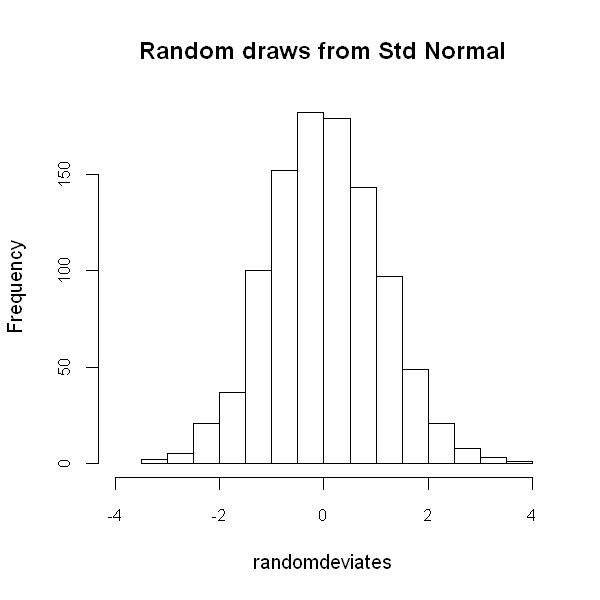

In [1]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(1, 1))

randomdeviates<-rnorm(1000,0,1)
hist(randomdeviates, main="Random draws from Std Normal", cex.axis=.8, xlim=c(-4,4))

The function cumsum returns a vector whose elements are the cumulative sums, products, minima or maxima of the elements of the argument. For example:

In [2]:
cumsum(1:10)
cumsum(rep(1,10))

[1]  1  3  6 10 15 21 28 36 45 55

[1]  1  2  3  4  5  6  7  8  9 10

A standard Wiener process (often called Brownian motion) on the interval $[0,T]$  is a random variable $W(T)$ that depends continuously on $t \in [0,T]$ and satisfies the following:
$$W(0)=0$$
$$W(t) - W(s) = \sqrt{t-s} \cdot N(0,1) \quad \text{for} \quad 0 \le s < t \le T$$
where $N(0,1)$ is a normal distribution with zero mean and unit variance. Because the normal distribution is used, the process is oftened referred to as Gaussian;
$$\text{for} \quad 0 \le s < u < t < u < v \le T, \quad W(t)-W(s) \quad \text{and} \quad W(v)-W(u) \quad \text{are independent}$$  

The following function, give us a sample of Gaussian path, generating $n$ gaussian variables and using the fact that by definition $W(t+\Delta t) = W(t) + \sqrt{\Delta t} \cdot N(0,1)$. 

In [3]:
wiener = function( n ) {
  e = rnorm( n, 0, 1 )
  x = c(0,cumsum( e )) 
  return(x)
}

Option price extimate :  0.4141569

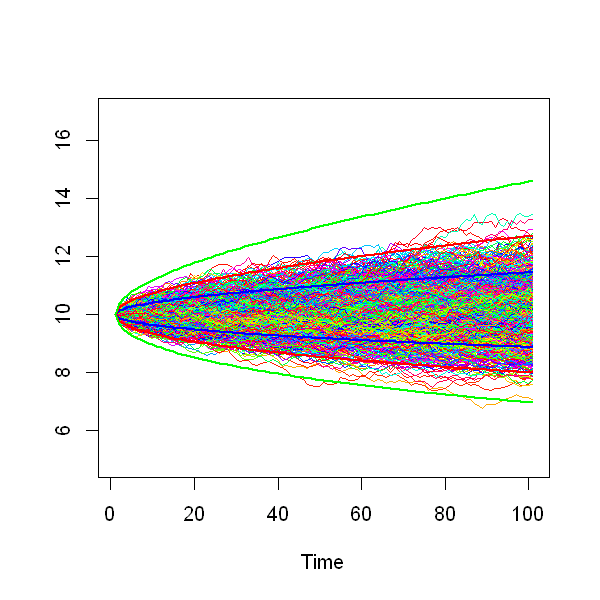

In [4]:
nStep      <- 100
nSim       <- 1000

S0     = 10
K      = 10
r      = 0.05
T      = 0.25
sigma  = 0.20

delta_t    <- T/nStep
t          <- seq(0,T,delta_t)

# drift 
drift   <- c(0,rep((r  - .5*sigma*sigma)*delta_t, nStep))
drift   <- cumsum(drift) 
paths   <- wiener(nStep)  
S1      <- S0*exp(drift + sigma * sqrt(delta_t) * paths)

lower = 0.50*min(S1)
upper = 1.50*max(S1)

plot( S1, type="l",ylim = c(lower,upper), xlab = "Time", ylab="" )

payoff = 0
ST     = c()

for(i in 1:nSim){
  paths <- wiener(nStep)  
  S     <- S0*exp(drift + sigma * sqrt(delta_t) * paths)
  lines( S , col=sample(rainbow(100)))
  payoff = payoff + max(S[length(S)] - K,0)
  ST = c(ST, S[length(S)])
}

payoff = exp(-r*T)*(payoff / nSim)
cat("Option price extimate : ", payoff)

# Adding confidence level curve

# 90-th percentile
p <- qnorm(0.9)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='blue')
lines(y2, lwd=2,col='blue')

# 99-th percentile
p <- qnorm(0.99)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='red')
lines(y2, lwd=2,col='red')

# 99.99-th percentile
p <- qnorm(0.9999)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='green')
lines(y2, lwd=2,col='green')
